In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


**Import Dataset from Roboflow**

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir TrafficSignDetection

mkdir: cannot create directory ‘TrafficSignDetection’: File exists


In [ ]:
!ls

TrafficSignDetection


In [ ]:
path = "/content/TrafficSignDetection"

In [ ]:
%pwd

'/content'

In [ ]:
import os
os.chdir(path)

In [ ]:
%pwd

'/content/TrafficSignDetection'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="g08hirLgdBOUN7HZCxzA")
project = rf.workspace("suman-g0ec4").project("self-driving-cars-lfjou-k8wkp")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


**Train YOLOv8 model on Custom Dataset**

In [ ]:
os.chdir("/content/TrafficSignDetection/Self-Driving-Cars-1")

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=20 imgsz=640 batch=10

Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

Display weights

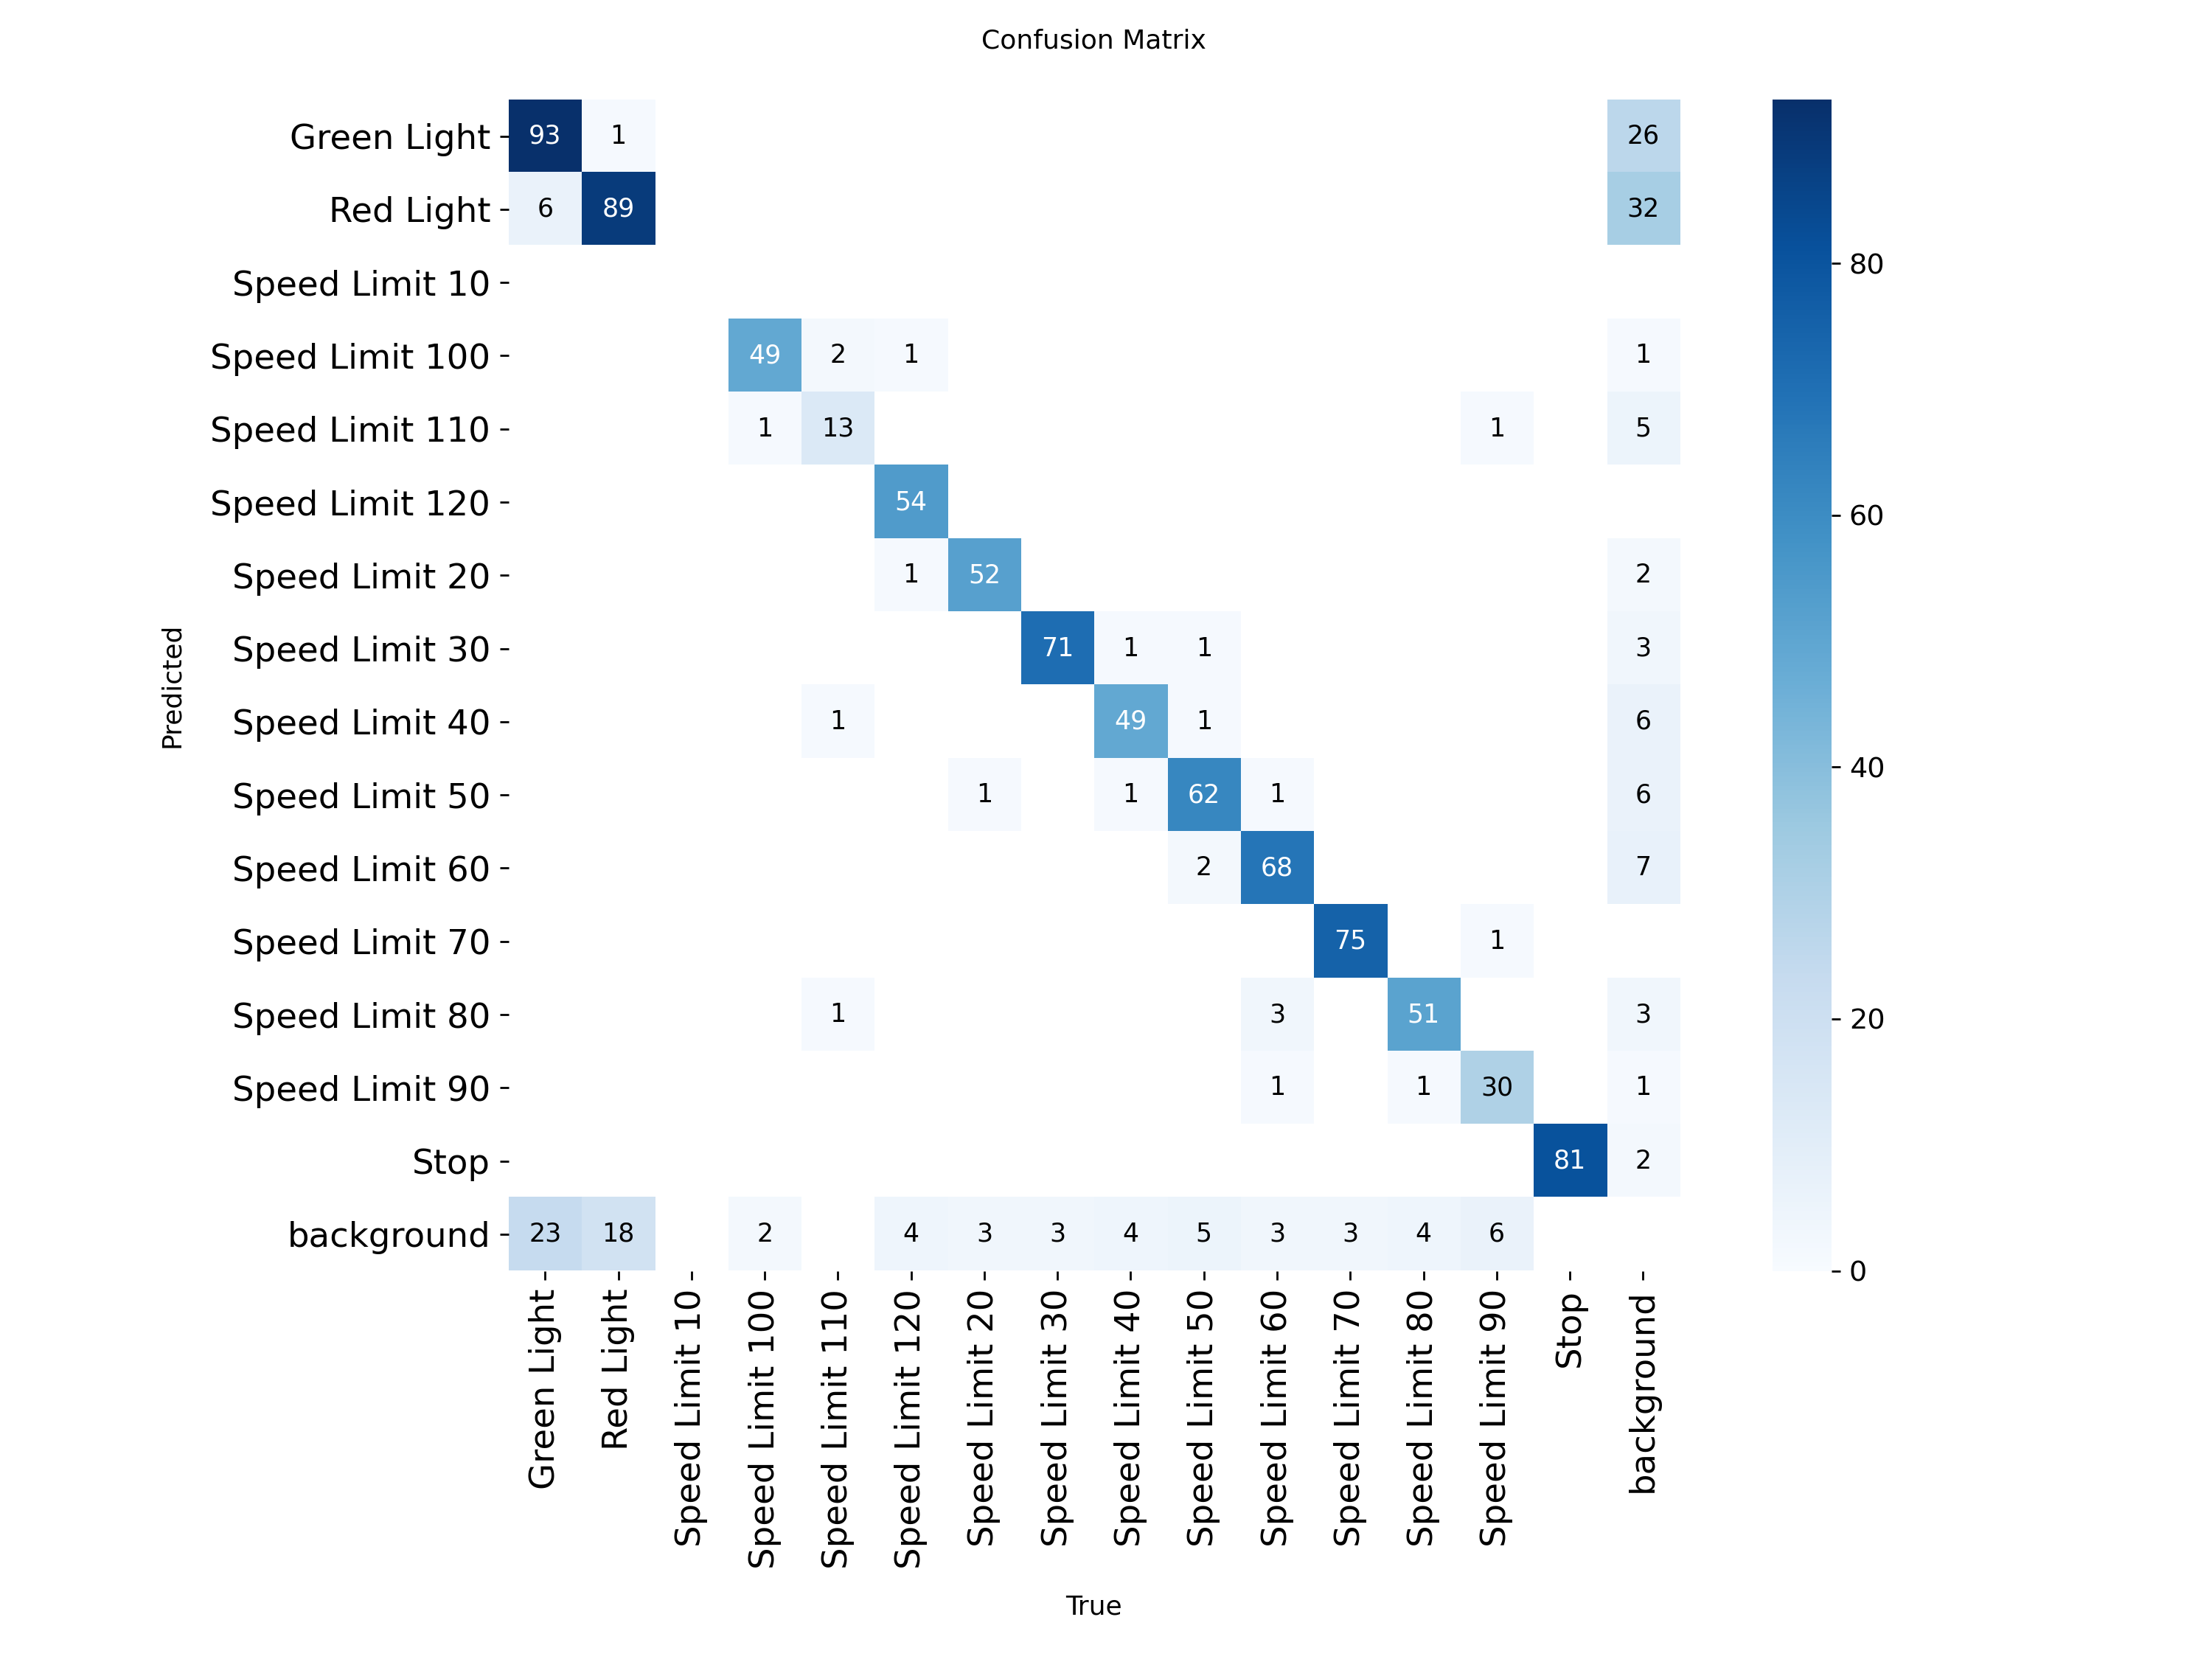

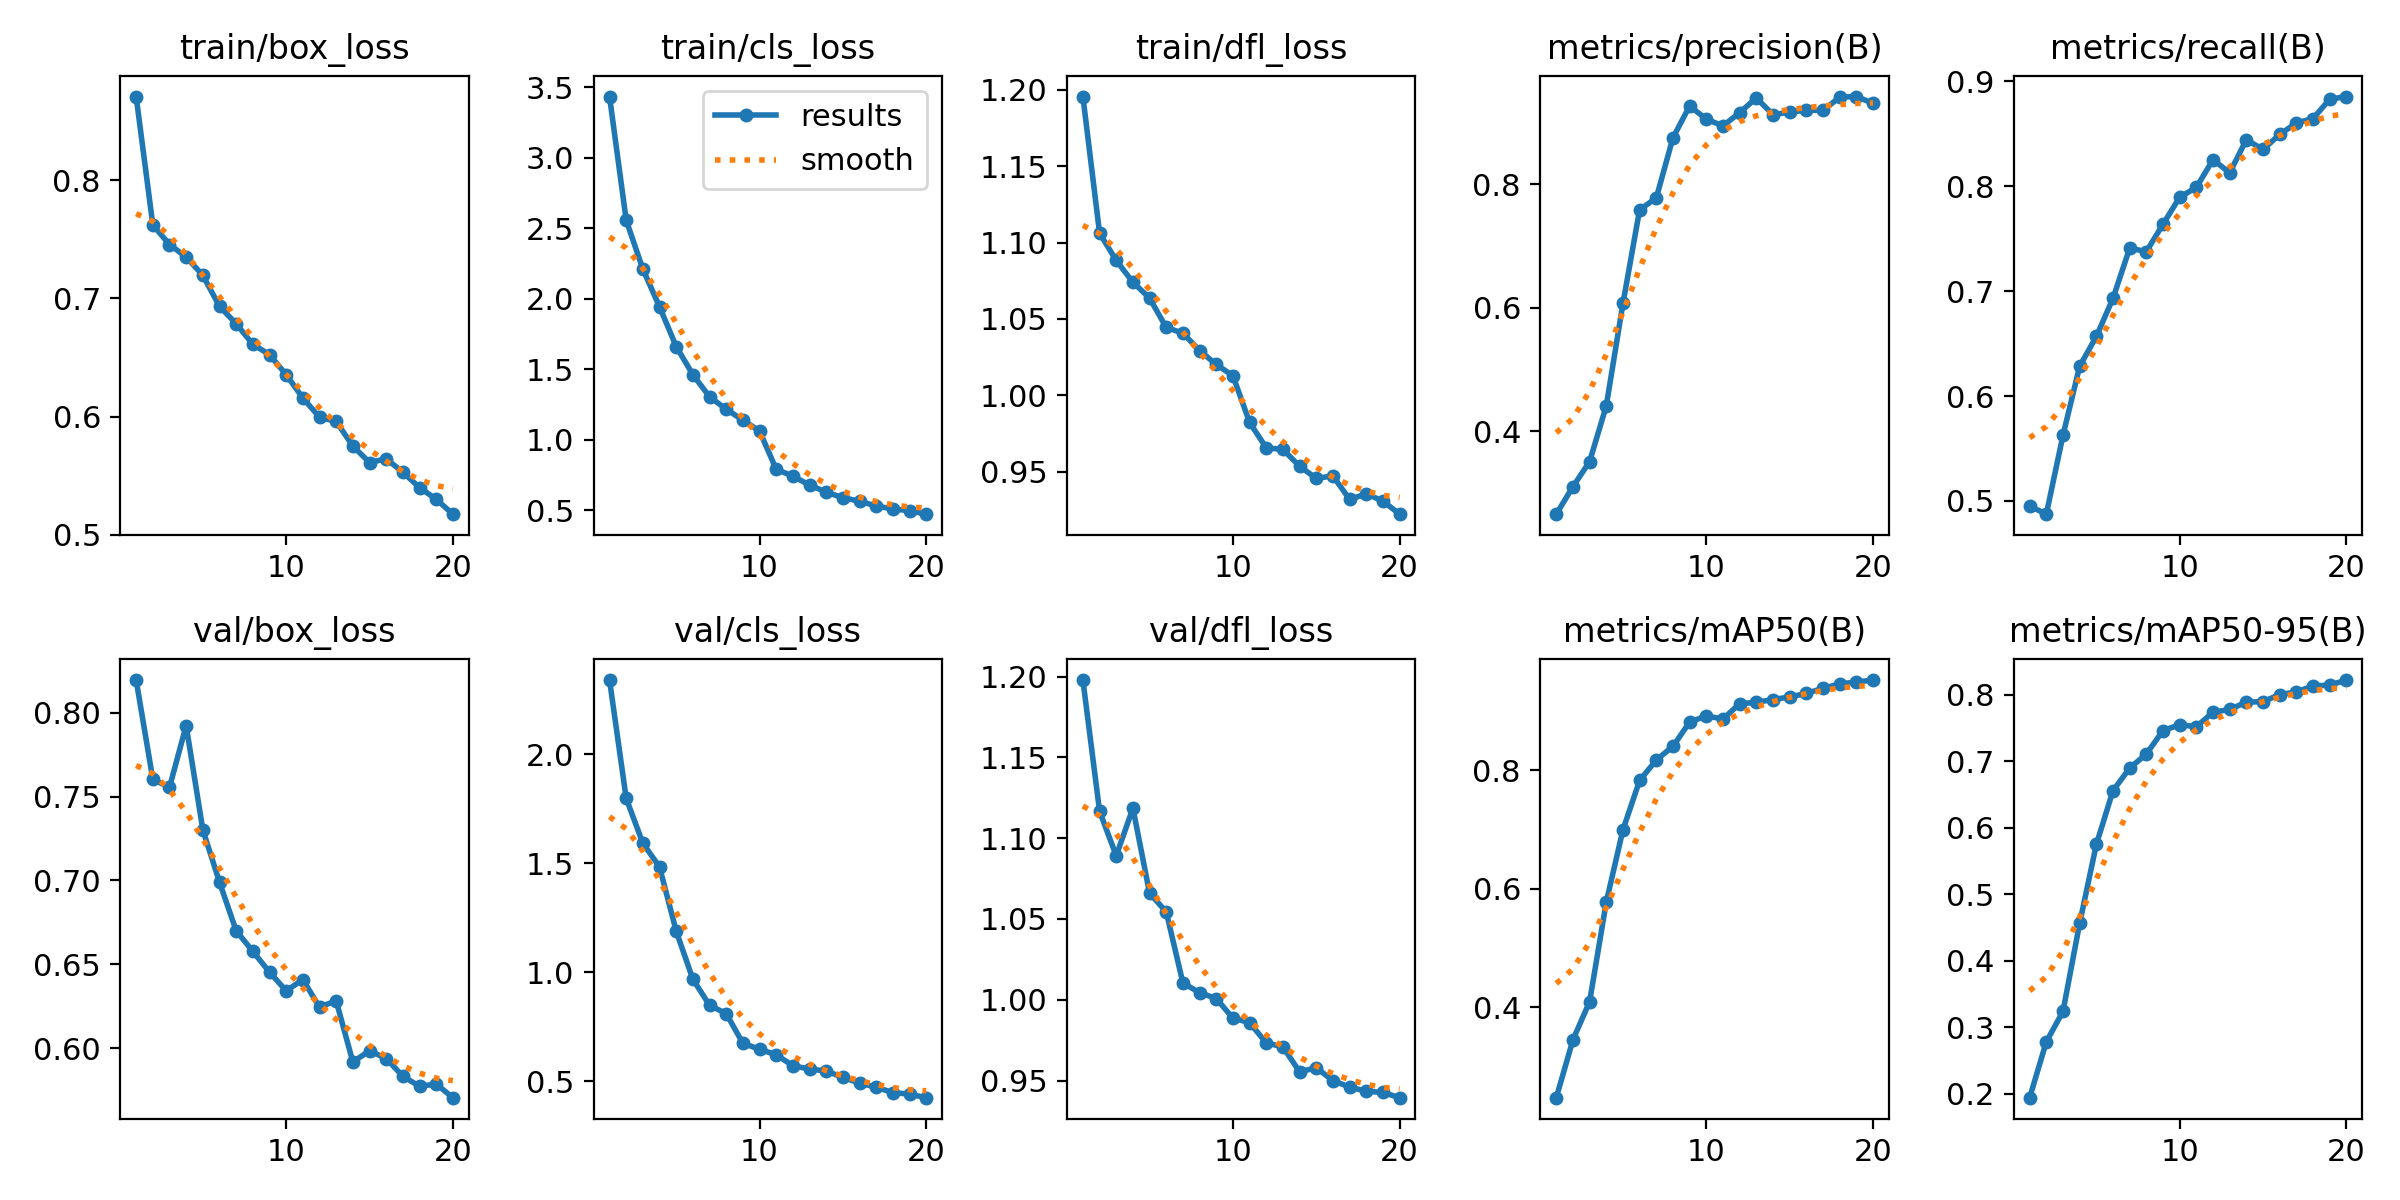

In [ ]:
from IPython.display import Image, display
display(Image('/content/TrafficSignDetection/Self-Driving-Cars-1/runs/detect/train3/confusion_matrix.png'))
display(Image('/content/TrafficSignDetection/Self-Driving-Cars-1/runs/detect/train3/results.png'))

train/box_loss : measures how well the model predicts bounding box locations.It’s based on regression of box coordinates (x, y, width, height).  
train/cls_loss : how well the model correctly identifies what the object is.  
train/dfl_loss:measures the distribution of bounding box regression offsets-it refines how precise box edges are.


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/valid/images/000474_jpg.rf.371c0fadd35a636e30fbdc0899845516.jpg: 640x640 1 Speed Limit 70, 13.0ms
Speed: 2.9ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


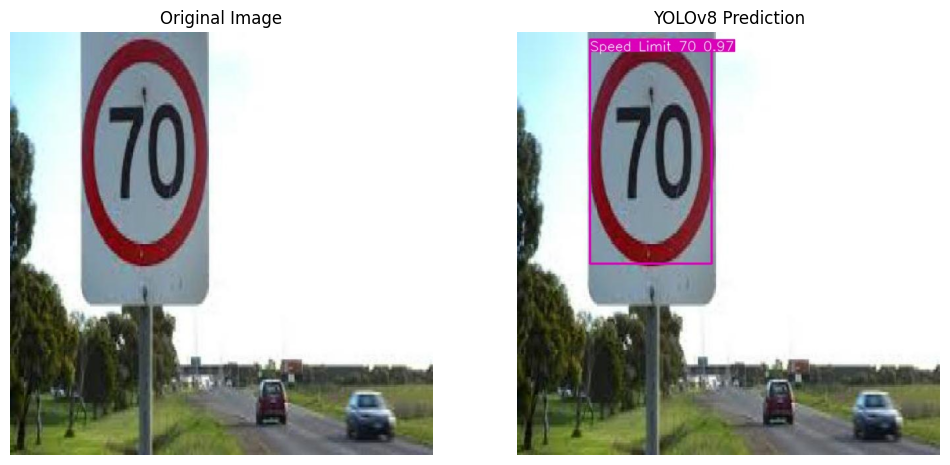


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/valid/images/000339_jpg.rf.ac2d7ef4edc89ddf14d5789882d103b4.jpg: 640x640 1 Speed Limit 60, 9.9ms
Speed: 4.4ms preprocess, 9.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


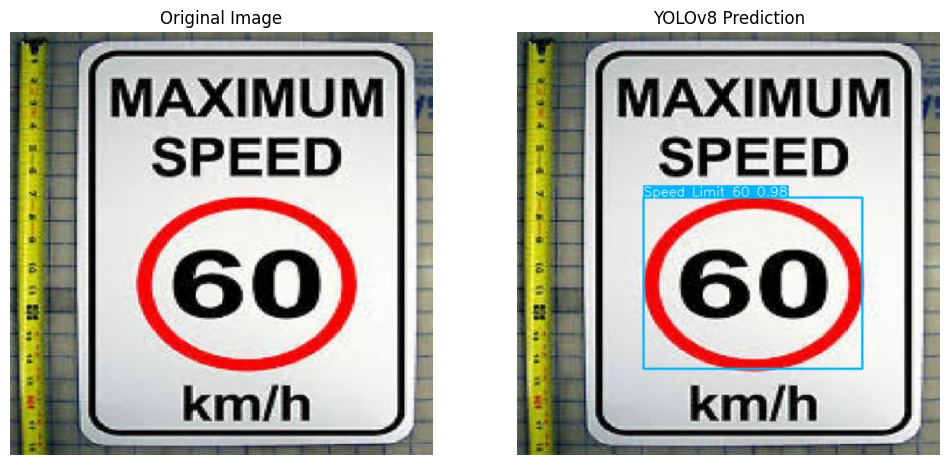


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/valid/images/FisheyeCamera_1_00002_png.rf.b51721d854042bcb47898b5b7cb38fb3.jpg: 640x640 1 Stop, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


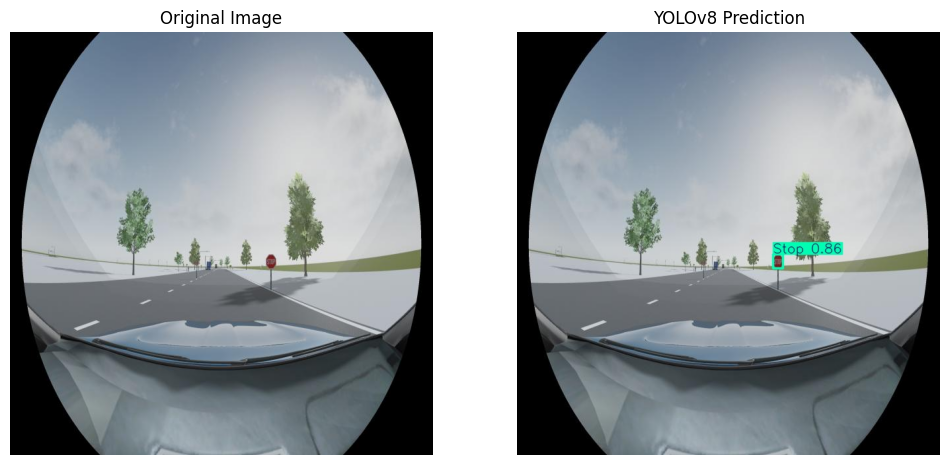


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/valid/images/00003_00008_00014_png.rf.b863671b4a4c2cbd559a2856377f559d.jpg: 640x640 1 Speed Limit 60, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


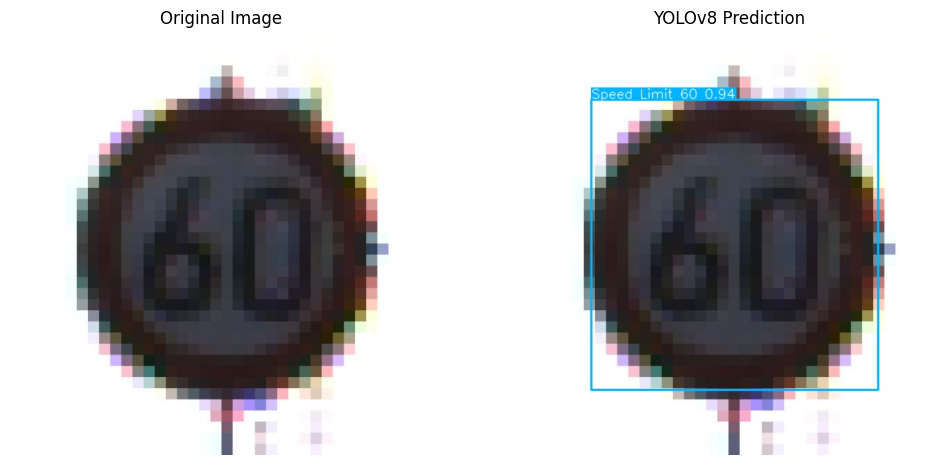


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/valid/images/road372_png.rf.013b8c009e98f8f990f432bd5e633201.jpg: 640x640 1 Speed Limit 40, 8.6ms
Speed: 2.4ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


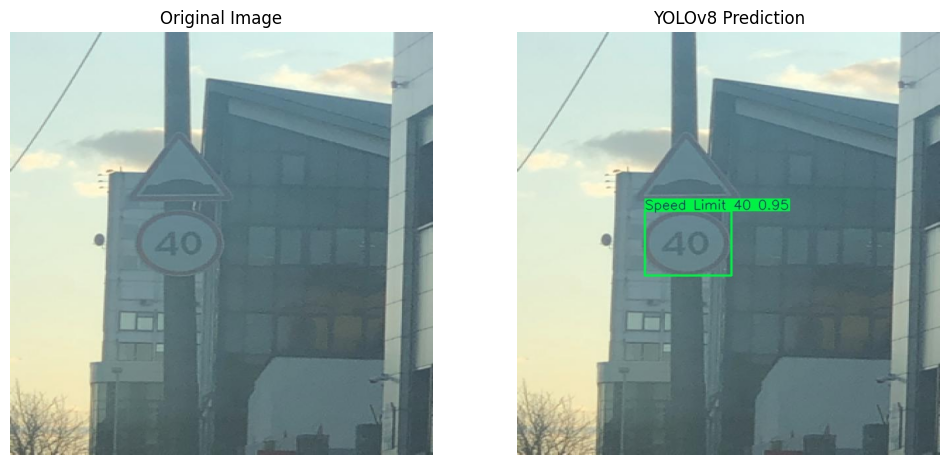

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from IPython.display import display, Image

#Load your trained YOLOv8 model
model = YOLO("/content/TrafficSignDetection/Self-Driving-Cars-1/runs/detect/train3/weights/best.pt")

val_images_path = "/content/TrafficSignDetection/Self-Driving-Cars-1/valid/images"

#Get a few random sample images
image_files = [os.path.join(val_images_path, f) for f in os.listdir(val_images_path) if f.endswith(('.jpg', '.png'))]
sample_images = image_files[:5]  # pick first 5

#Run inference and visualize
for img_path in sample_images:
    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Run YOLO prediction
    results = model(img_path)

    # Save the predicted image temporarily
    output_img_path = "pred_" + os.path.basename(img_path)
    results[0].save(filename=output_img_path)  # save image with bounding boxes

    # Load predicted image
    pred_img = cv2.imread(output_img_path)
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

    # Display side by side: Original vs Predicted
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(pred_img)
    axes[1].set_title("YOLOv8 Prediction")
    axes[1].axis("off")

    plt.show()



image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/test/images/000566_jpg.rf.b210b8f6ba9db73064f669cf07e31220.jpg: 640x640 1 Speed Limit 80, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


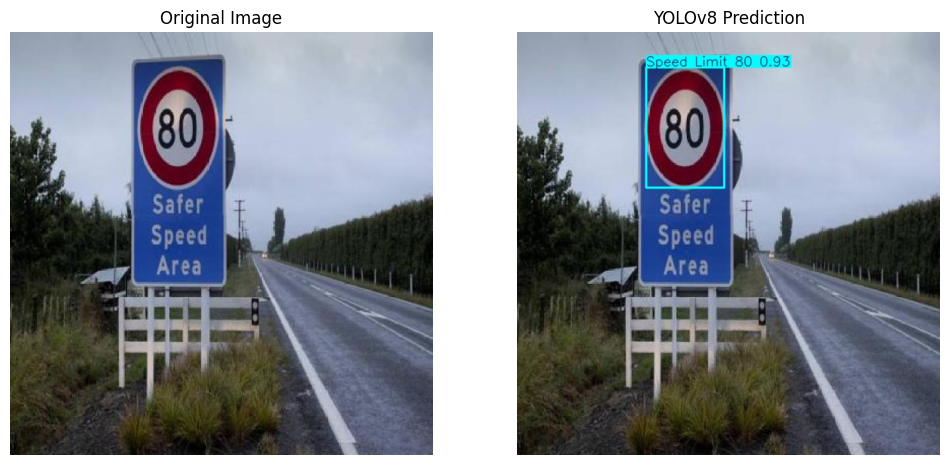


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/test/images/FisheyeCamera_1_00454_png.rf.e23688c6c5cc33b4ec6608768ab0481d.jpg: 640x640 1 Speed Limit 90, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


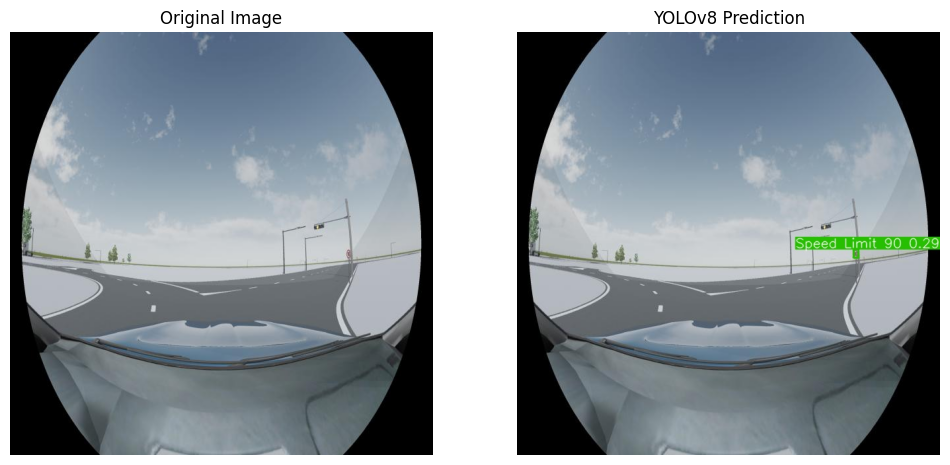


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/test/images/000652_jpg.rf.3462a259c639836dad413a249d10ad93.jpg: 640x640 1 Speed Limit 80, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


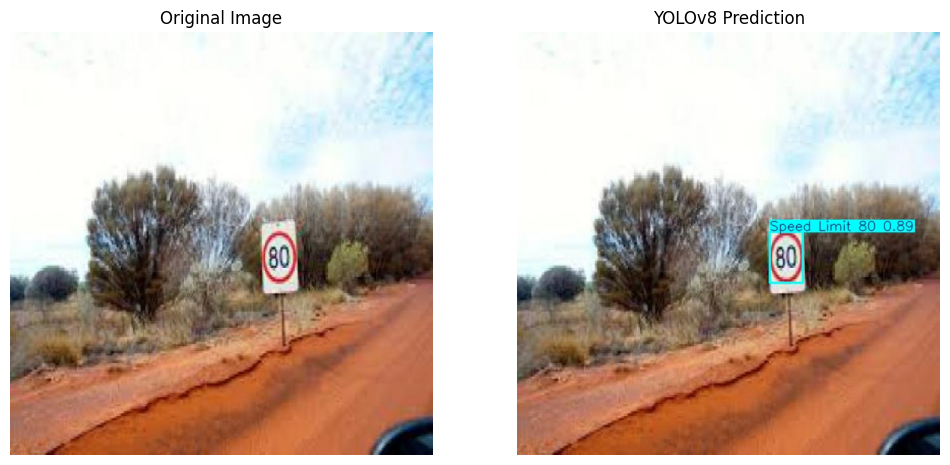


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/test/images/road320_png.rf.e0d8e59e96fc4056f6c8df2724f2ce54.jpg: 640x640 1 Speed Limit 40, 11.0ms
Speed: 2.3ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


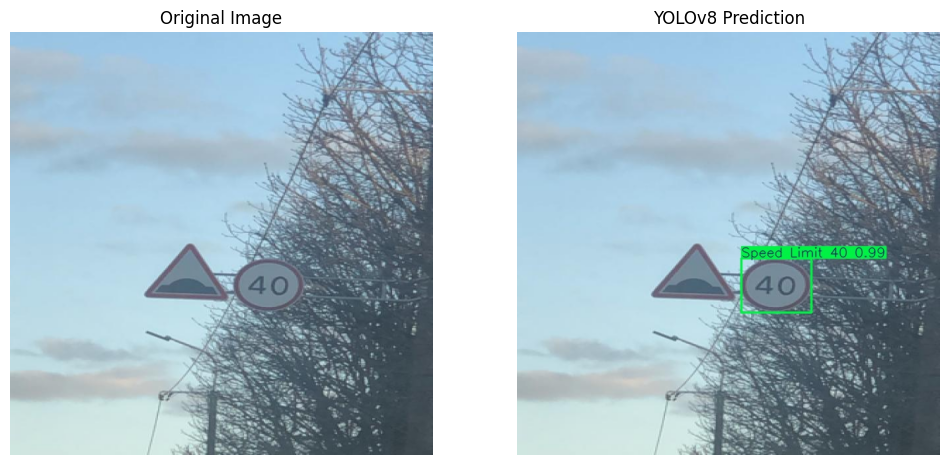


image 1/1 /content/TrafficSignDetection/Self-Driving-Cars-1/test/images/00003_00010_00012_png.rf.d99aa09177186cff41eb3002d4acca5a.jpg: 640x640 1 Speed Limit 60, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


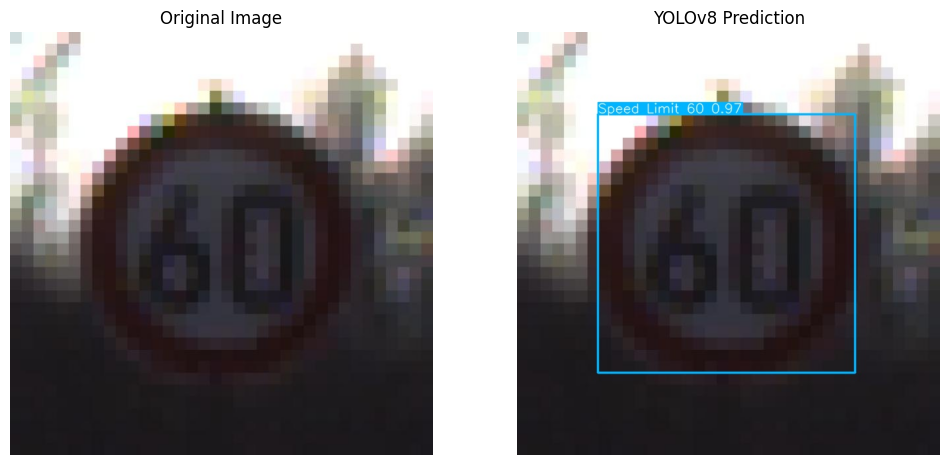

In [ ]:
test_images_path = "/content/TrafficSignDetection/Self-Driving-Cars-1/test/images"

#Get a few random sample images
image_files = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]
sample_images = image_files[:5]  # pick first 5

#Run inference and visualize
for img_path in sample_images:
    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Run YOLO prediction
    results = model(img_path)

    # Save the predicted image temporarily
    output_img_path = "pred_" + os.path.basename(img_path)
    results[0].save(filename=output_img_path)  # save image with bounding boxes

    # Load predicted image
    pred_img = cv2.imread(output_img_path)
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

    # Display side by side: Original vs Predicted
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(pred_img)
    axes[1].set_title("YOLOv8 Prediction")
    axes[1].axis("off")

    plt.show()


In [ ]:
!ffmpeg -i /content/trafficlightvideo.mp4 -vf "scale=640:640" /content/resized_video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!yolo task=detect mode=predict model={best_model} conf=0.25 source="/content/resized_video.mp4" save=True


Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/1500) /content/resized_video.mp4: 640x640 (no detections), 10.2ms
video 1/1 (frame 2/1500) /content/resized_video.mp4: 640x640 (no detections), 10.4ms
video 1/1 (frame 3/1500) /content/resized_video.mp4: 640x640 (no detections), 9.7ms
video 1/1 (frame 4/1500) /content/resized_video.mp4: 640x640 (no detections), 9.8ms
video 1/1 (frame 5/1500) /content/resized_video.mp4: 640x640 (no detections), 7.3ms
video 1/1 (frame 6/1500) /content/resized_video.mp4: 640x640 (no detections), 8.6ms
video 1/1 (frame 7/1500) /content/resized_video.mp4: 640x640 (no detections), 7.3ms
video 1/1 (frame 8/1500) /content/resized_video.mp4: 640x640 (no detections), 9.5ms
video 1/1 (frame 9/1500) /content/resized_video.mp4: 640x640 (no detections), 9.7ms
video 1/1 (frame 10/1500) /content/resized_video.mp4: 640x640 (no detections),

In [ ]:
import cv2

# Input and output paths
input_video = "/content/trafficlightvideo.mp4"
output_video = "/content/trafficlightvideo_preprocessed.mp4"

# Open the input video
cap = cv2.VideoCapture(input_video)

# Get properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Resize to a smaller size for YOLO (640x640 or 720p)
target_size = (640, 640)

# Define the codec and output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, target_size)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize
    frame = cv2.resize(frame, target_size)

    # Optional brightness/contrast enhancement
    frame = cv2.convertScaleAbs(frame, alpha=1.2, beta=20)  # alpha: contrast, beta: brightness

    # Write frame
    out.write(frame)

cap.release()
out.release()

print(f"✅ Preprocessed video saved at: {output_video}")


In [ ]:
!yolo task=detect mode=predict model={best_model} conf=0.25 source="/content/trafficlightvideo_preprocessed.mp4" save=True
